In [1]:

import time
import pandas as pd
import glob
import numpy as np
import timeit
import pickle

from multiprocessing import Pool
from matplotlib import pyplot as plt
def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
start_time = timeit.default_timer()

# import matplotlib.pyplot as plt

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
%config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
#matplotlib.rcParams.update({'font.size': 18})



def importPGNData(filepath):
    """This function returns the data read as a string"""
    with open(filepath) as f:
        return f.readlines()
def getEdgePoints(data):
    """This function returns the start and end indices for each game in the PGN"""
    ends=[]
    starts=[]
    for n,l in enumerate(data):
        if l.startswith("[Event"):
            if n!=0:
                ends.append(n - 1)
            starts.append(n)
        elif (n==len(data)-1):
            ends.append(n)

    return (starts,ends)


## Plan--
1. save each game in a dict by 'player_id' and write to pickle file
    - read player name from the game
    - 0th line is event type, 1st is site, 2nd is white player id, 3rd is black player id
result_2. iterate over all months, years
3. merge dicts by 'player_id'

In [2]:
# 'myVar' in locals():
# del event_type,time_control,white_player,black_player,result_,utcdate,utctime,whiteelo,blackelo,opening_,actual_game_;


In [ ]:

#----------------------------------------------------
# importing the pgn
#----------------------------------------------------

t_ic=time.time();

YEAR_OF_PGN=2017
for MONTH_OF_PGN in range(1,13):
    if MONTH_OF_PGN<10: MONTH_OF_PGN='0'+str(MONTH_OF_PGN)
    # files="/mnt/sdb1/sandeep/chess_data/lichess_db_standard_rated_2018-12.pgn"
    files="/mnt/sdb1/sandeep/chess_data/lichess_db_standard_rated_"+str(YEAR_OF_PGN)+"-"+str(MONTH_OF_PGN)+".pgn"

    data = importPGNData(files)
    t_oc=time.time();
    print(t_oc-t_ic,' seconds')

    #----------------------------------------------------
    # Getting the begining and ending point of games in the data file
    #----------------------------------------------------

    starts, ends = getEdgePoints(data)
    t_oc=time.time();
    print(t_oc-t_ic,' seconds')

    #----------------------------------------------------
    #Making dictionary {player name : [game details]}
    #----------------------------------------------------
    dict_career={}
    #31179146
    LL=len(starts)
    for it_game in range(LL):
        if it_game % 50000 == 0:
            t_oc = time.time();
            print('MONTH=',MONTH_OF_PGN,'-----',it_game/LL)
            with open("/mnt/sdb1/sandeep/0. Careers in chess/a_prog_year_month_"+str(YEAR_OF_PGN)+".txt", "a") as file_object:
                file_object.write('Y='+str(YEAR_OF_PGN)+'-MONTH='+str(MONTH_OF_PGN)+'--'+str(it_game/LL)+'--i.e.-'+str(it_game)+'/'+str(LL)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')

        game=data[starts[it_game]:ends[it_game]]
        flag_actual=0;
        for it in range(len(game)):
            l=game[it]
            if l.startswith("[Event"):            event_type=l.split('"')[1]
            if l.startswith("[White "):            white_player=l.split('"')[1]
            if l.startswith("[Black "):            black_player=l.split('"')[1]            
            if l.startswith("[Result"):            result_=l.split('"')[1]
            if l.startswith("[WhiteElo"):            whiteelo=l.split('"')[1]
            if l.startswith("[BlackElo"):            blackelo=l.split('"')[1]
            if l.startswith("[UTCDate"):            utcdate=l.split('"')[1]
            if l.startswith("[UTCTime"):            utctime=l.split('"')[1]
            if l.startswith("[WhiteRatingDiff"):            wratdiff=l.split('"')[1]
            if l.startswith("[BlackRatingDiff"):            bratdiff=l.split('"')[1]
            if l.startswith("[ECO"):            eco_=l.split('"')[1]
            if l.startswith("[Opening"):            opening_=l.split('"')[1]
            if l.startswith("[TimeControl"):            time_control=l.split('"')[1]            
            if l.startswith("1."):            actual_game_=l;flag_actual=1; break

        if flag_actual==1:

            everything_about_game=[event_type,time_control,white_player,black_player,result_,utcdate,utctime,whiteelo,blackelo,opening_,actual_game_]    


            if white_player in dict_career.keys():
                dict_career[white_player].append(everything_about_game)
            else:
                dict_career.setdefault(white_player, []).append(everything_about_game)

            if black_player in dict_career.keys():
                dict_career[black_player].append(everything_about_game)
            else:
                dict_career.setdefault(black_player, []).append(everything_about_game)
            del event_type,time_control,white_player,black_player,result_,utcdate,utctime,whiteelo,blackelo,opening_,actual_game_;

    #----------------------------------------------------
    # Writing dictionary to file 
    #----------------------------------------------------        
    file_write="/mnt/sdb1/sandeep/0. Careers in chess/dict_lichess_db_standard_rated_"+str(YEAR_OF_PGN)+"-"+str(MONTH_OF_PGN)+".pkl"
    with open(file_write, 'wb') as f:
        pickle.dump(dict_career, f, pickle.HIGHEST_PROTOCOL)

    t_oc=time.time();
    print(t_oc-t_ic,' seconds')

21.061689138412476  seconds
65.28474354743958  seconds
MONTH= 01 ----- 0.0
MONTH= 01 ----- 0.004681337604211256
MONTH= 01 ----- 0.009362675208422513
MONTH= 01 ----- 0.014044012812633769
MONTH= 01 ----- 0.018725350416845025
MONTH= 01 ----- 0.023406688021056284
MONTH= 01 ----- 0.028088025625267538
MONTH= 01 ----- 0.03276936322947879
MONTH= 01 ----- 0.03745070083369005
MONTH= 01 ----- 0.04213203843790131
MONTH= 01 ----- 0.04681337604211257
MONTH= 01 ----- 0.05149471364632382
MONTH= 01 ----- 0.056176051250535076
MONTH= 01 ----- 0.060857388854746335
MONTH= 01 ----- 0.06553872645895759
MONTH= 01 ----- 0.07022006406316884
MONTH= 01 ----- 0.0749014016673801
MONTH= 01 ----- 0.07958273927159136
MONTH= 01 ----- 0.08426407687580262
MONTH= 01 ----- 0.08894541448001388
MONTH= 01 ----- 0.09362675208422513
MONTH= 01 ----- 0.09830808968843638
MONTH= 01 ----- 0.10298942729264764
MONTH= 01 ----- 0.1076707648968589
MONTH= 01 ----- 0.11235210250107015
MONTH= 01 ----- 0.11703344010528141
MONTH= 01 ----- 0.1

# Career lengths

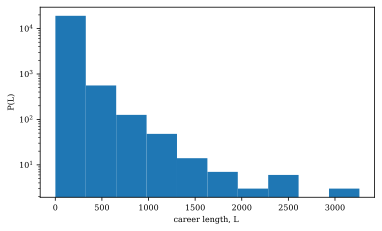

In [4]:

career_len=[]
cc=0
for key_ in dict_career:
    career_len.append(len((dict_career[key_])))
#     cc=cc+1; 
#     if cc>10: break;

fig = plt.figure(0,figsize=(6, 3.5));
ax = fig.add_subplot(1, 1, 1);
ax.hist(career_len);

# ax.legend(store_lines,leg_,loc=(1.04,0));
ax.set(xlabel="career length, L ", ylabel='P(L)');
ax.set_yscale('log',base=10)
# ax.set_xticks(xtick_s)
# # ax.set_xlim(1,100)

In [5]:
# for it_game in range(10):
#     game=data[starts[it_game]:ends[it_game]]
#     print(game,'\n\n--------------------------------------\n')